<a href="https://colab.research.google.com/github/LivingstonTardzenyuy/Deep-Learning-with-TensorFlow/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Netoworks and Computer Vision with Tensorflow.

Computer Vision is the practice of writing algorithms that can discover pattersn in visual data. Such as the camera of a self-driving car recognizing the car infront.

In [ ]:
# Get the data.
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
local_zip = './pizza_steak.zip'
zip_ref = zipfile.ZipFile(local_zip)
zip_ref.extractall()
zip_ref.close()

--2025-08-10 04:01:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   142MB/s    in 0.7s    

2025-08-10 04:01:37 (142 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with the data)

A very crucial step at the beginning of any Machine Learning project is becoming one with the project.

Hence we need to visualize many samples of our data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# wak through the pizza_steak dir and list number of files.
for dirpath, dirnames, filenames in os.walk('./pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in ./pizza_steak
There are 2 directories and 0 images in ./pizza_steak/train
There are 0 directories and 750 images in ./pizza_steak/train/pizza
There are 0 directories and 750 images in ./pizza_steak/train/steak
There are 2 directories and 0 images in ./pizza_steak/test
There are 0 directories and 250 images in ./pizza_steak/test/pizza
There are 0 directories and 250 images in ./pizza_steak/test/steak


In [ ]:
# Another way to find out how many images are in a file.
num_steak_images_train = len(os.listdir('./pizza_steak/train/steak'))
num_steak_images_train

750

In [ ]:
# To visualize our images, first let's get the class names programatically.

import pathlib
import numpy as np

data_dir = pathlib.Path('./pizza_steak/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


Image shape: (512, 512, 3)


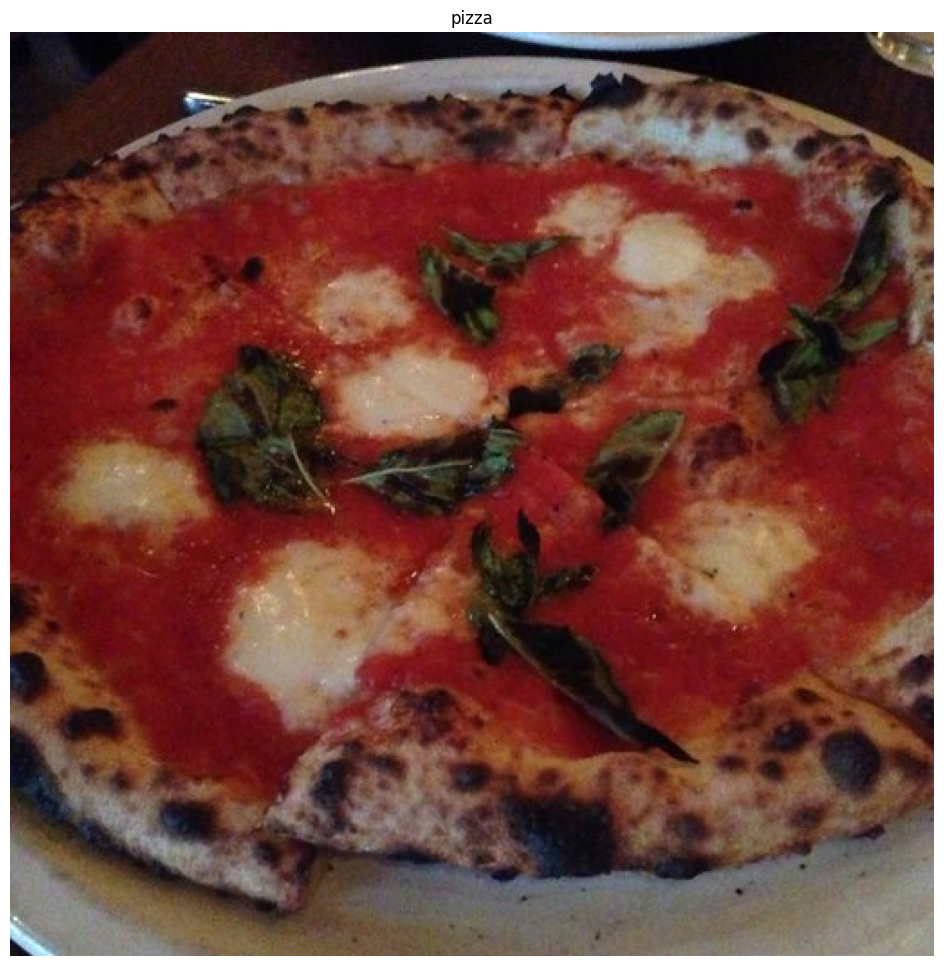

In [ ]:
# Let's visualize our images.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

plt.figure(figsize=(12, 12))

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path.
  random_image_path = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib.
  img = mpimg.imread(target_folder + '/' + random_image_path[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

# View a random image from the training dataset.
img = view_random_image(target_dir='./pizza_steak/train/', target_class='pizza')

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 27,  19,  30],
        [ 23,  15,  26],
        [ 20,  12,  23],
        ...,
        [125, 116,  85],
        [125, 119,  87],
        [131, 125,  91]],

       [[ 23,  15,  26],
        [ 24,  16,  27],
        [ 25,  17,  28],
        ...,
        [127, 116,  86],
        [126, 115,  83],
        [134, 126,  90]],

       [[ 21,  13,  24],
        [ 23,  15,  26],
        [ 24,  18,  28],
        ...,
        [133, 117,  84],
        [129, 113,  80],
        [129, 115,  80]],

       ...,

       [[ 29,  20,  21],
        [ 32,  23,  26],
        [ 24,  18,  22],
        ...,
        [148, 150, 137],
        [146, 150, 135],
        [152, 156, 141]],

       [[ 26,  21,  18],
        [ 29,  24,  21],
        [ 27,  21,  21],
        ...,
        [148, 150, 137],
        [146, 150, 135],
        [151, 155, 140]],

       [[ 32,  29,  24],
        [ 28,  25,  20],
        [ 22,  17,  14],
        ...,
        [149, 151, 13

In [ ]:
# Get all the pixel values between 0 and 1.

img/ 255.

array([[[0.10588235, 0.0745098 , 0.11764706],
        [0.09019608, 0.05882353, 0.10196078],
        [0.07843137, 0.04705882, 0.09019608],
        ...,
        [0.49019608, 0.45490196, 0.33333333],
        [0.49019608, 0.46666667, 0.34117647],
        [0.51372549, 0.49019608, 0.35686275]],

       [[0.09019608, 0.05882353, 0.10196078],
        [0.09411765, 0.0627451 , 0.10588235],
        [0.09803922, 0.06666667, 0.10980392],
        ...,
        [0.49803922, 0.45490196, 0.3372549 ],
        [0.49411765, 0.45098039, 0.3254902 ],
        [0.5254902 , 0.49411765, 0.35294118]],

       [[0.08235294, 0.05098039, 0.09411765],
        [0.09019608, 0.05882353, 0.10196078],
        [0.09411765, 0.07058824, 0.10980392],
        ...,
        [0.52156863, 0.45882353, 0.32941176],
        [0.50588235, 0.44313725, 0.31372549],
        [0.50588235, 0.45098039, 0.31372549]],

       ...,

       [[0.11372549, 0.07843137, 0.08235294],
        [0.1254902 , 0.09019608, 0.10196078],
        [0.09411765, 0

In [ ]:
# get the maximum and minimum pixel value.
print(f'Maximum pixel value: {tf.reduce_max(img)}')
print(f'Minimum pixel value: {tf.reduce_min(img)}')

Maximum pixel value: 255
Minimum pixel value: 0


## An end-to-end example

Let's build CNN to find patterns in our images, more speicifically we need a way to:

1. Load our images.
2. Preprocess our images.
3. Build a CNN to find patterns in our images.
4. Compile our CNN.
5. Fit the CNN to our training data.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)

valid_generator = ImageDataGenerator(rescale=1./255)


# Setup paths to our data directories.
train_dir = './pizza_steak/train'
test_dir = './pizza_steak/test'

# Import data from directories and turn in into batches.
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size = (224, 224),
    class_mode = "binary",
    seed=42
)

valid_data = valid_generator.flow_from_directory(
    directory = test_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = "binary",
    seed = 42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Build a CNN model.

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# compile the model.
model_1_summary = model_1.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - accuracy: 0.5994 - loss: 0.6501 - val_accuracy: 0.8160 - val_loss: 0.4530
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.7740 - loss: 0.4726 - val_accuracy: 0.8440 - val_loss: 0.3667
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.8166 - loss: 0.4242 - val_accuracy: 0.8500 - val_loss: 0.3482
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.8383 - loss: 0.4092 - val_accuracy: 0.8520 - val_loss: 0.3340
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.8450 - loss: 0.3484 - val_accuracy: 0.8600 - val_loss: 0.3277


Note: We had to change to use GPU rather than CPU that is why the cell above runs faster.

In [ ]:
# evaluate the model.
model_1.evaluate(valid_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.8665 - loss: 0.3205


[0.3277282118797302, 0.8600000143051147]

In [ ]:
# get model summary.

model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Using the same model as before.

Let's replicate the model we've built in the previous section to see if it works with our image data.



In [ ]:
# set the random seed.
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow playground.
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model.
model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# fit the model.
model_2_history = model_2.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 153ms/step - accuracy: 0.4954 - loss: 0.8965 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.4764 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.5192 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.4887 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.5080 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932


In [ ]:
# get model summary.
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

## Binary Classification: Let's break it down.

* Become one with the data(visaulize, visualize, visualize)
* Preprocess the data (preapred it for our model, the main stpe we did where scaling/normalizing)
* Created the model.
* Fit the model
* Evaluate the model


In [ ]:
train_data

In [ ]:
## 2. Preproces the data (prepare it for a model)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"



batchTurn our images into **batches**

A batch is a small subset of data. Rather than look at tall images at once, a model might only look at 32 at a time.

It does this for a couple of reasons:


In [ ]:
!nvidia-smi

Sun Aug 10 04:03:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P0             28W /   70W |    1690MiB /  15360MiB |      3%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image dat from directory and turn into batches.

train_data = train_datagen.flow_from_directory(
    train_dir,                  # target directory of images.
    batch_size = 32,            # size of minibatches to load data into.
    target_size = (224, 224),   # target size of images.
    class_mode = "binary"       # we have binary data hence we use binary
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = "binary"
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch.
images, labels = train_data.__next__()    # getting the next set of images.
len(images), len(labels)

(32, 32)

In [ ]:
# Get the first two images.
images[:2], images[0].shape

(array([[[[0.05490196, 0.05882353, 0.07843138],
          [0.04705883, 0.0509804 , 0.07058824],
          [0.04313726, 0.04705883, 0.06666667],
          ...,
          [0.2627451 , 0.16862746, 0.02745098],
          [0.21568629, 0.1254902 , 0.        ],
          [0.18823531, 0.10588236, 0.        ]],
 
         [[0.0509804 , 0.05490196, 0.07450981],
          [0.04705883, 0.0509804 , 0.07058824],
          [0.04705883, 0.0509804 , 0.07058824],
          ...,
          [0.38823533, 0.29411766, 0.1137255 ],
          [0.3529412 , 0.2627451 , 0.09803922],
          [0.33333334, 0.24313727, 0.08235294]],
 
         [[0.03529412, 0.03921569, 0.05882353],
          [0.04313726, 0.04705883, 0.06666667],
          [0.0509804 , 0.05490196, 0.07450981],
          ...,
          [0.46274513, 0.36078432, 0.12941177],
          [0.44705886, 0.34901962, 0.12941177],
          [0.43921572, 0.34117648, 0.12156864]],
 
         ...,
 
         [[0.08627451, 0.04705883, 0.01176471],
          [0.09411

In [ ]:
# view the first batch of labels.
labels[:5]

array([1., 1., 0., 0., 1.], dtype=float32)

In [ ]:
# Create the baseline model.It is the baseline model we set during a machine learning.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# create the model(a 3 layer CNN network).
model_4_baseline = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
model_4_baseline.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 121000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │       121,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,191 (477.31 KB)

 Trainable params: 122,191 (477.31 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the model.
model_4_baseline.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]

)

# Fit the model.
model_4_baseline_history = model_4_baseline.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - accuracy: 0.5535 - loss: 1.0068 - val_accuracy: 0.8060 - val_loss: 0.4270
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.8005 - loss: 0.4316 - val_accuracy: 0.8460 - val_loss: 0.3581
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.8889 - loss: 0.2832 - val_accuracy: 0.8340 - val_loss: 0.3811
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.9271 - loss: 0.2576 - val_accuracy: 0.8580 - val_loss: 0.3245
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.9473 - loss: 0.1707 - val_accuracy: 0.8500 - val_loss: 0.3358


In [ ]:
# evluate the model.
model_4_baseline.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.8391 - loss: 0.3563


[0.3357539474964142, 0.8500000238418579]

# Evaluating our model.

It looks like our model is learning something. L'ets evaluate it.

<Axes: >

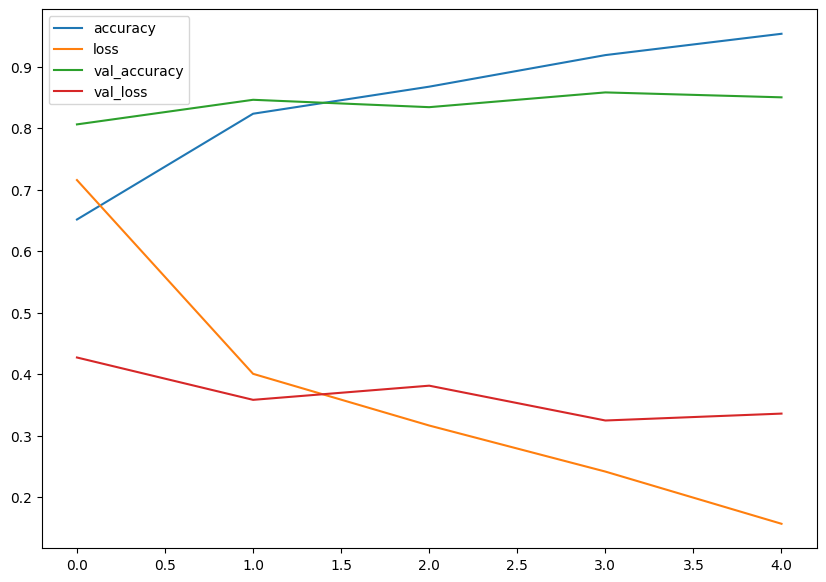

In [ ]:
import pandas as pd

pd.DataFrame(model_4_baseline_history.history).plot(
    figsize=(10, 7)
)

In [ ]:
# Let's seperate the plots. ie plot the validation and training curves seperately.

def plot_loss(history, model_name):
  """
    Returns seperate loss curves for training and validation matrix.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))    # How many epochs

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("losss")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")

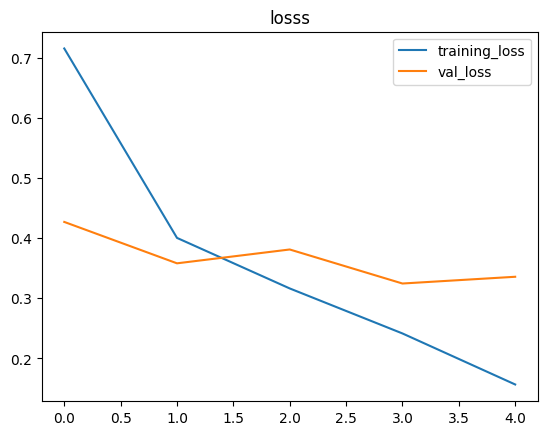

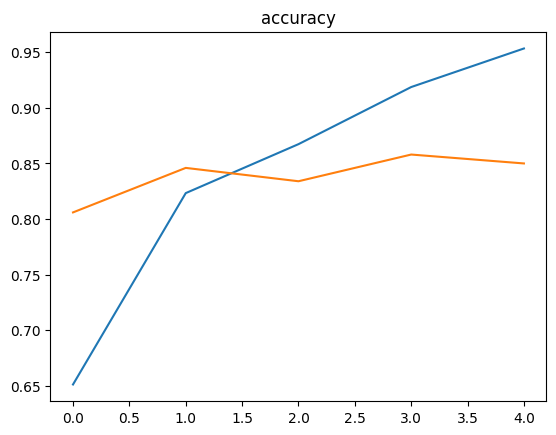

In [ ]:
plot_loss(model_4_baseline_history, model_4_baseline)

## we will see ways to prevent our model from overfitting.

WE will adjust the model parameters.
Fitting a machine learning model comes in 3 steps:

0. Create a baseline.
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

Ways to induce overfitting.
1. Increase the number of layers.
2. Increase the filter conv size.
3. Add another dense layer to the output of our flattened layer.


Reduce overfitting:
1. Add data augmentation.
2. Add regulaization layer such as (MaxPool2D)
3. Add more data.

In [ ]:
# create the model. This is going to be our new baseline.

model_5 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224,3), activation="relu"),
    MaxPool2D(pool_size=2),  # downscale our inputs to find the most importance features by taking the max value.
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model.
model_5.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)


# Fit the model.
model_5_history = model_5.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_steps = len(valid_data),
    validation_data = test_data
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - accuracy: 0.5798 - loss: 0.6600 - val_accuracy: 0.7700 - val_loss: 0.4868
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.7466 - loss: 0.5112 - val_accuracy: 0.8440 - val_loss: 0.3736
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.8252 - loss: 0.4057 - val_accuracy: 0.8640 - val_loss: 0.3547
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - accuracy: 0.8041 - loss: 0.4102 - val_accuracy: 0.8600 - val_loss: 0.3280
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.8515 - loss: 0.3612 - val_accuracy: 0.8700 - val_loss: 0.3280


In [ ]:
# Get a summary of max pooling layer
model_5.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

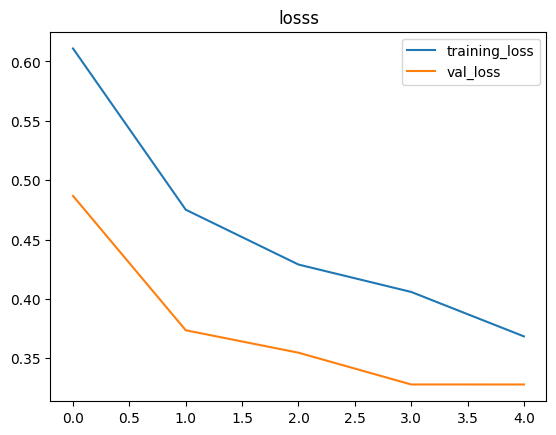

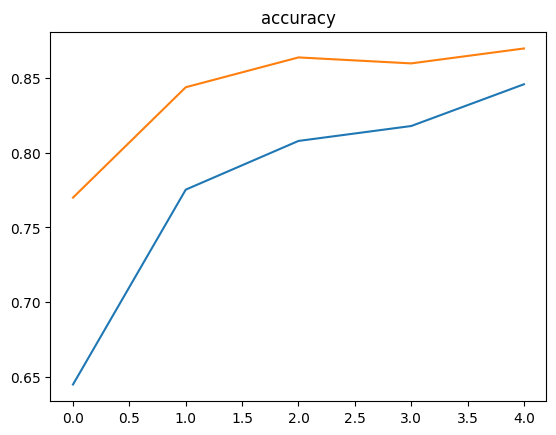

In [ ]:
# Plot loss curves.
plot_loss(model_5_history, model_5)

### Opening our bags of tricks and finding data augmentation.

In [ ]:
# Create ImageDataGenerator training instance with data augmentation.

train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True
)


# Create ImageDataGenerator without data augmentation.
train_datagen = ImageDataGenerator(rescale=1/255.)


# Create ImageDataGenerator without data augmentation for the test dataset.
test_datagen = ImageDataGenerator(rescale=1/255.)

## **Question:** What is data augmentation.

Data Augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn generalizable(hopefully) patterns.

Let's write some code to visualize data augmentation...

In [ ]:
# import data and augment it from training dir.

print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = "binary",
    seed = 42
)


# Create non-augmented train data batches.
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = "binary",
    seed = 42
)


# Create non-augmented test data batches.
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = "binary",
    seed = 42
)

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


**Note** Data augmentation is usually only performeded on the training data. Using 'ImageDataGenerator' built-in data augmentation parameters our data loaded into the model

In [ ]:
# Let's visualize some augmented data.

images, labels = train_data.__next__()
augmented_images, augmented_labels = train_data_augmented.__next__()     # Labels aren't augmented only train images.

Showing image number: 23


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

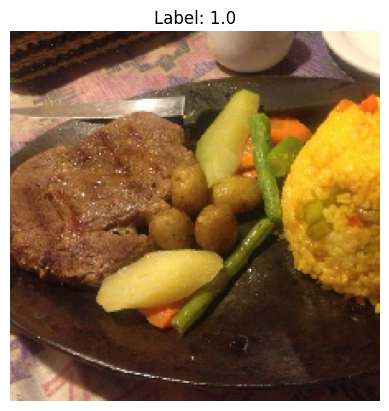

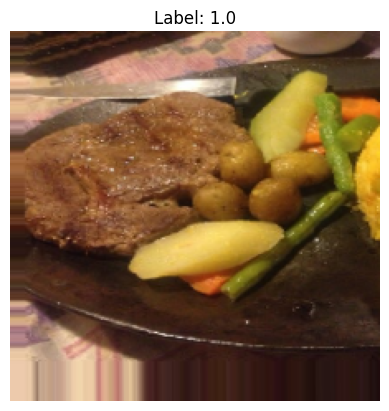

In [ ]:
# import random
random_number = random.randint(0, 32)
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Label: {labels[random_number]}")
plt.axis("off")
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Label: {augmented_labels[random_number]}")
plt.axis("off")

## Building the model using our Augmented training data

In [ ]:
# Create the mmodel.

model_augmented_data = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model.
model_augmented_data.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

In [ ]:
# Fit the model.
model_augmented_data_history = model_augmented_data.fit(
    train_data_augmented,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 474ms/step - accuracy: 0.5900 - loss: 0.6775 - val_accuracy: 0.7760 - val_loss: 0.4987
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 433ms/step - accuracy: 0.7548 - loss: 0.5223 - val_accuracy: 0.8160 - val_loss: 0.4119
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 419ms/step - accuracy: 0.7690 - loss: 0.5034 - val_accuracy: 0.7760 - val_loss: 0.4804
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 407ms/step - accuracy: 0.7909 - loss: 0.4645 - val_accuracy: 0.8320 - val_loss: 0.3778
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 425ms/step - accuracy: 0.7993 - loss: 0.4617 - val_accuracy: 0.8220 - val_loss: 0.3738


## Building the next model and shuffle our augmented training data to train another model same as before then see what happend.



In [ ]:
# Import Data and augmented and shuffle it from training directory.

train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = "binary",
    seed = 42,
    shuffle = True
)



Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model same as model_6.

model_7_augmented_shuffle = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Fit the model.
model_7_augmented_shuffle.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# fit the model.
model_7_augmented_shuffle_history = model_7_augmented_shuffle.fit(
    train_data_augmented_shuffle,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented_shuffle),
    validation_data = test_data,
    validation_steps = len(test_data)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 455ms/step - accuracy: 0.5181 - loss: 0.6808 - val_accuracy: 0.6740 - val_loss: 0.6111
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 441ms/step - accuracy: 0.6678 - loss: 0.6138 - val_accuracy: 0.7300 - val_loss: 0.5313
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 419ms/step - accuracy: 0.7029 - loss: 0.5709 - val_accuracy: 0.7660 - val_loss: 0.4849
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 459ms/step - accuracy: 0.7084 - loss: 0.5623 - val_accuracy: 0.8160 - val_loss: 0.4244
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 411ms/step - accuracy: 0.7516 - loss: 0.5289 - val_accuracy: 0.8440 - val_loss: 0.3618


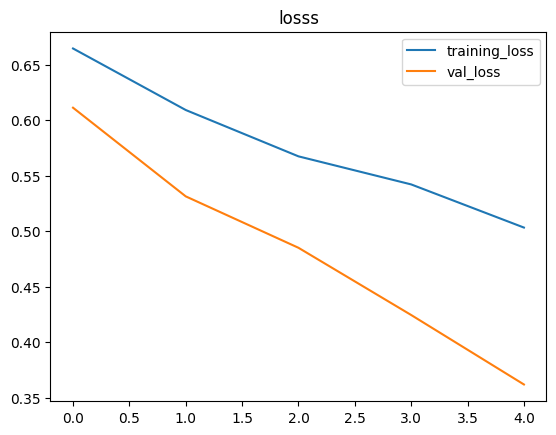

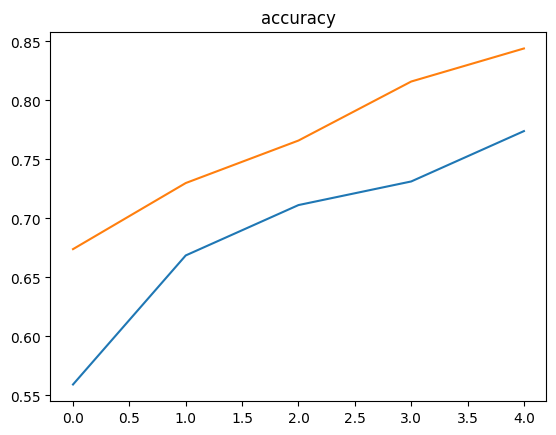

In [ ]:
# Plot loss curves.
plot_loss(model_7_augmented_shuffle_history, model_7_augmented_shuffle)

### 7. Repeat until satisfied.

Since we've already beaten our baseline they are a few things we can try to continue to improve our model.

* Increase the number of model layers
* Increase the number of filters in each Convolutaional layer
* Train for longer (more epochs)
* Find an ideal learning rate.
* Get more data (give model more opportunites to learn)
* Use Transfer learning(Levearing what another model has learn and adjust it to our usecase)

In [ ]:
# Build the model.

model_8_augmented_shuffle_CNN_explainer = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model.
model_8_augmented_shuffle_CNN_explainer.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

# Fit the mdoel.
model_8_augmented_shuffle_CNN_explainer_history = model_8_augmented_shuffle_CNN_explainer.fit(
    train_data_augmented_shuffle,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented_shuffle),
    validation_data = test_data,
    validation_steps = len(test_data)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 467ms/step - accuracy: 0.5216 - loss: 0.6912 - val_accuracy: 0.6200 - val_loss: 0.6474
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 412ms/step - accuracy: 0.6538 - loss: 0.6388 - val_accuracy: 0.6880 - val_loss: 0.5708
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 432ms/step - accuracy: 0.7276 - loss: 0.5445 - val_accuracy: 0.8320 - val_loss: 0.3979
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 440ms/step - accuracy: 0.7606 - loss: 0.4862 - val_accuracy: 0.8720 - val_loss: 0.3382
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 433ms/step - accuracy: 0.7731 - loss: 0.4707 - val_accuracy: 0.8480 - val_loss: 0.3365


## Making a prediction with our trained model on our custom data.

In [ ]:
# Classes we're working wiht.
print(class_names)

['pizza' 'steak']


In [ ]:
# Vie an exmaple image.

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


--2025-08-10 04:32:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.7’

03-steak.jpeg.7     100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2025-08-10 04:32:56 (42.5 MB/s) - ‘03-steak.jpeg.7’ saved [1978213/1978213]



(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

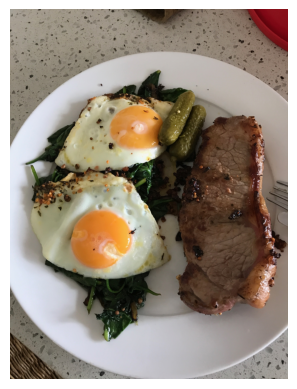

In [ ]:

steak = mpimg.imread("03-steak.jpeg.7")
plt.imshow(steak)
plt.axis(False)

In [ ]:
# Test our custom image.
custom_image = tf.expand_dims(steak, axis=0)    # To include our batch size.
custom_image.shape

TensorShape([1, 4032, 3024, 3])

In [ ]:
model_7_augmented_shuffle.predict(custom_image)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_7" is incompatible with the layer: expected axis -1 of input shape to have value 6760, but received input with shape (1, 1887520)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 4032, 3024, 3), dtype=uint8)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

**Notes** When we train a nueral network and want to make predictions on it on our custom data its important that our custom data is preprocess in the same format as our model was trained on

In [ ]:
# Create a function to import our image and resize it to be able for us to make predictions.

def load_and_prep_image(filename, img_shape = 224):
  """
    Reads an image from file name and turn it into our tenro and reshape it to (img_shape, img_shape, color_channels).
  """

  # Read in the image.
  img = tf.io.read_file(filename)

  # Decode our image then resize it.
  img_rescale = tf.image.decode_image(img, channels=3)
  img_rescale = tf.image.resize(img_rescale, size = [img_shape, img_shape])

  # Rescale the image
  img_rescale = img_rescale / 255.
  return img_rescale

In [ ]:
# call our random image.
load_and_prep_image("03-steak.jpeg.7")

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
# Make a prediction with our custom image.
preprocessed_image = load_and_prep_image("03-steak.jpeg.7")
pred_custom_image = model_7_augmented_shuffle.predict(tf.expand_dims(preprocessed_image, axis=0))
pred_custom_image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.90470505]], dtype=float32)

### Our model outputs a prediction probability, well it could be nice we visualize image as well as model's prediction.


In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the rpredicted class by rounding the predictions prob and rounding it.

pred_class = class_names[int(tf.round(pred_custom_image))]
pred_class

np.str_('steak')

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
  """
    Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  img = load_and_pred_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class.
  pred_class = class_names[int(tf.round(pred))]

  # Get the predicted class.
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class.
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

## Multi-class Image Classification

1. Become one with the data.
2. Preprocess the data (get it ready for a model)
3. Create a model(Start with baseline)
4. Fit the model(overfit it to make sure it works)
5. Evaluate the model.
6. Adjust d/f parameters and improve the model.
7. Repeat until satisfied

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


# Unzip our data.
zip_file = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_file.extractall()
zip_file.close()


--2025-08-11 14:09:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.207, 173.194.203.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   248MB/s    in 2.0s    

2025-08-11 14:09:34 (248 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# walk through our 10 classes of food image data.
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' ")

There are 2 directories and 0 images in '10_food_classes_all_data' 
There are 10 directories and 0 images in '10_food_classes_all_data/train' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice' 

In [3]:
# Setup the train and test directories.

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
# Le'ts get class names.
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (384, 512, 3)


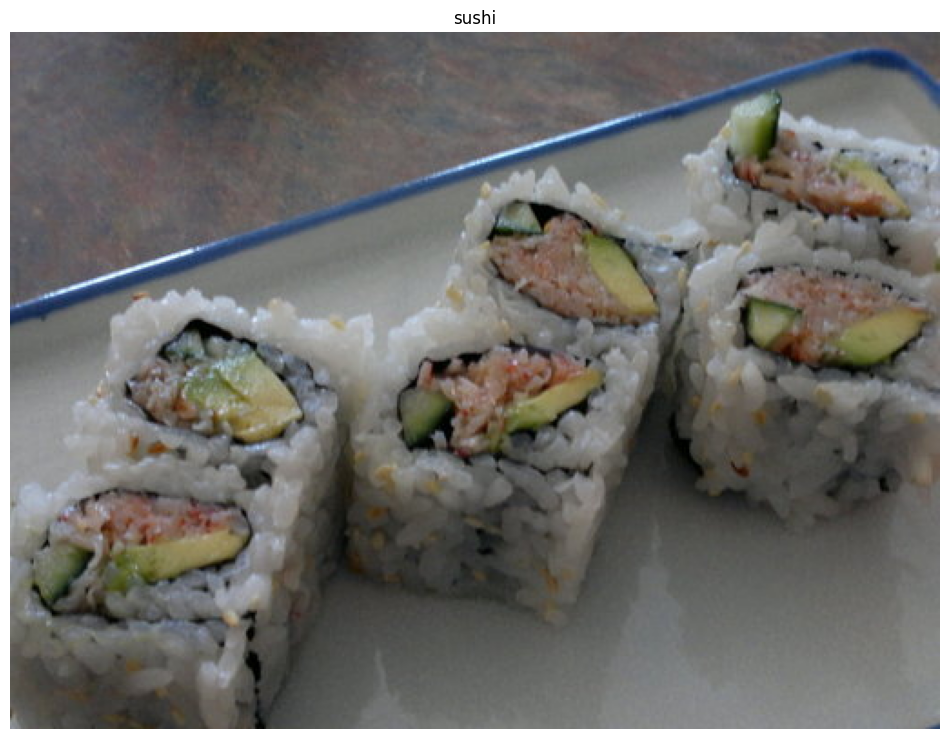

In [9]:
# Let's visualize our images.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

plt.figure(figsize=(12, 12))

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path.
  random_image_path = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib.
  img = mpimg.imread(target_folder + '/' + random_image_path[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

# View a random image from the training dataset.
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

### 2. Preprocess the data(prepare it for a model)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# rescale.
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches.
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = "categorical",
    seed = 42,
    shuffle = True
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = "categorical",
    seed = 42
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [14]:
# Create a CNN model.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model_0 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# get model summary.
model_0.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        67,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,710 (272.30 KB)

 Trainable params: 69,710 (272.30 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# compile the  model.

model_0.compile(
    loss = "categorical_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

# fit the model.

model_0_history = model_0.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 118ms/step - accuracy: 0.1819 - loss: 2.2154 - val_accuracy: 0.3108 - val_loss: 1.9680
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 113ms/step - accuracy: 0.3284 - loss: 1.9104 - val_accuracy: 0.3136 - val_loss: 1.9250
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.4272 - loss: 1.6955 - val_accuracy: 0.3544 - val_loss: 1.8296
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.4834 - loss: 1.5344 - val_accuracy: 0.3636 - val_loss: 1.8911
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.5583 - loss: 1.3375 - val_accuracy: 0.3560 - val_loss: 1.9692


In [17]:
# Evaluate the model.
model_0.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.3571 - loss: 1.9742


[1.969184160232544, 0.35600000619888306]

In [19]:
# Let's seperate the plots. ie plot the validation and training curves seperately.

def plot_loss(history, model_name):
  """
    Returns seperate loss curves for training and validation matrix.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))    # How many epochs

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("losss")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")

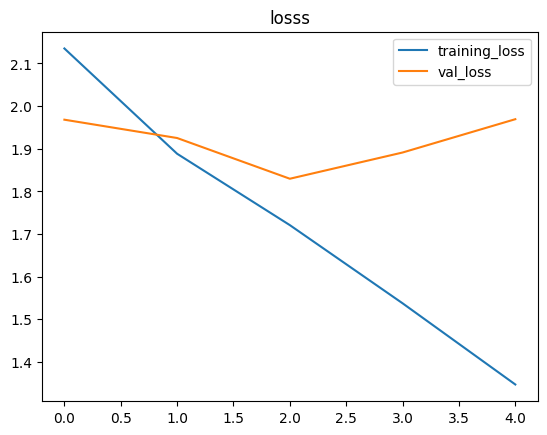

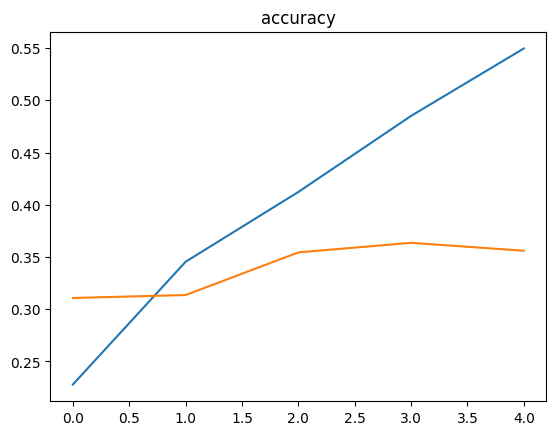

In [20]:
# Check out the model loss curves on the 10 classes.
plot_loss(model_0_history, model_0)

### our model is **Overfitting** where it peforms well on train dataset and poorly on test dataset.

### 6. Adjust the model hyperparameters to reduce overfitting